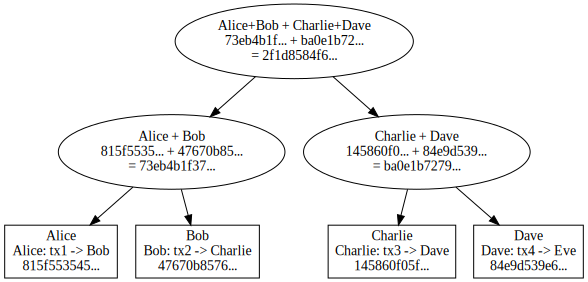

In [5]:
import hashlib
from graphviz import Digraph
from IPython.display import SVG, display

def sha256(data):
    return hashlib.sha256(data.encode('utf-8')).hexdigest()

def build_merkle_tree_with_names(leaves):
    dot = Digraph(comment='Merkle Tree')
    node_counter = 0
    current_level = [sha256(leaf) for leaf in leaves]

    node_ids = []
    hash_map = {}
    name_map = {}

    # 葉ノード作成
    for i, leaf in enumerate(leaves):
        node_id = f"n{node_counter}"
        leaf_hash = current_level[i]
        name = leaf.split(":")[0].strip()  # 名前だけ取り出す
        label = f"{name}\n{leaf}\n{leaf_hash[:10]}..."
        dot.node(node_id, label, shape="box")
        node_ids.append(node_id)
        hash_map[node_id] = leaf_hash
        name_map[node_id] = name
        node_counter += 1

    # 上位ノード作成
    while len(current_level) > 1:
        next_level = []
        next_ids = []

        for i in range(0, len(current_level), 2):
            left_id = node_ids[i]
            right_id = node_ids[i+1] if i+1 < len(node_ids) else node_ids[i]

            left_hash = hash_map[left_id]
            right_hash = hash_map[right_id]

            left_name = name_map[left_id]
            right_name = name_map[right_id]

            combined = left_hash + right_hash
            parent_hash = sha256(combined)

            node_id = f"n{node_counter}"
            label = f"{left_name} + {right_name}\n{left_hash[:8]}... + {right_hash[:8]}...\n= {parent_hash[:10]}..."
            dot.node(node_id, label)
            dot.edge(node_id, left_id)
            dot.edge(node_id, right_id)

            hash_map[node_id] = parent_hash
            name_map[node_id] = f"{left_name}+{right_name}"
            next_level.append(parent_hash)
            next_ids.append(node_id)
            node_counter += 1

        current_level = next_level
        node_ids = next_ids

    return dot.pipe(format='svg')

# 🌿 使用例（Jupyter Notebook）
transactions = [
    "Alice: tx1 -> Bob",
    "Bob: tx2 -> Charlie",
    "Charlie: tx3 -> Dave",
    "Dave: tx4 -> Eve"
]

svg_data = build_merkle_tree_with_names(transactions)
display(SVG(svg_data))
